<a href="https://colab.research.google.com/github/Flaviasoz/social-media-productivity/blob/main/C%C3%B3pia_de_analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 2: Análise Exploratória de Dados (EDA)

**Objetivo**: Explorar relações e padrões nos dados processados  
**Dataset**: processed_data.csv  
**Autor**: Flávia Souza e Vinicius Loeblein

## 1. Configuração Inicial

In [ ]:
import os
import pandas as pd
import numpy as np
from scipy import stats
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def load_from_github():
    """Tenta carregar o dataset diretamente do GitHub"""
    github_url = "https://raw.githubusercontent.com/Flaviasoz/social-media-productivity/main/data/processed_data.csv"
    try:
        response = requests.get(github_url)
        response.raise_for_status()  # Verifica se houve erro na requisição
        df = pd.read_csv(StringIO(response.text))
        print("Dataset carregado com sucesso do GitHub!")
        return df
    except Exception as e:
        print(f"Não foi possível carregar do GitHub: {str(e)}")
        return None

def load_from_local():
    """Tenta carregar o dataset localmente"""
    # Verifica caminhos locais possíveis
    possible_paths = [
        '../data/processed_data.csv',
        'data/processed_data.csv',
        'processed_data.csv',
        '../processed_data.csv'
    ]

    for path in possible_paths:
        if os.path.exists(path):
            try:
                df = pd.read_csv(path)
                print(f"Dataset carregado localmente de: {path}")
                return df
            except Exception as e:
                print(f"Erro ao ler {path}: {str(e)}")

    print("Arquivo não encontrado nos caminhos locais padrão.")
    return None

def show_available_files():
    """Mostra arquivos disponíveis para ajudar na depuração"""
    print("\nArquivos disponíveis nos diretórios:")
    print("\nDiretório atual:", os.listdir('.'))
    if os.path.exists('../data'):
        print("\nDiretório ../data:", os.listdir('../data'))
    if os.path.exists('data'):
        print("\nDiretório data:", os.listdir('data'))

def upload_manually():
    """Função para upload manual do arquivo"""
    try:
        from google.colab import files
        print("\nExecutando no Google Colab - faça o upload do arquivo:")
        uploaded = files.upload()
        for fn in uploaded.keys():
            df = pd.read_csv(fn)
            print(f"Arquivo {fn} carregado com sucesso!")
            return df
    except:
        try:
            from tkinter import Tk, filedialog
            print("\nSelecione o arquivo manualmente:")
            root = Tk()
            root.withdraw()
            file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
            if file_path:
                df = pd.read_csv(file_path)
                print(f"Arquivo {file_path} carregado com sucesso!")
                return df
        except Exception as e:
            print(f"Erro ao carregar arquivo: {str(e)}")

    print("Nenhum arquivo carregado.")
    return None

# Fluxo principal de carregamento
print("Tentando carregar os dados...")

# 1. Primeiro tenta do GitHub
df = load_from_github()

# 2. Se não conseguir, tenta localmente
if df is None:
    print("\nTentando carregar localmente...")
    df = load_from_local()

# 3. Se ainda não encontrou, mostra opções
if df is None:
    show_available_files()
    print("\nOPÇÕES DISPONÍVEIS:")
    print("1. Verifique se o arquivo está em um dos locais padrão")
    print("2. Execute o notebook de limpeza de dados primeiro")
    print("3. Use o upload manual (descomente a linha abaixo)")
    # df = upload_manually()

# Mostra o dataset se carregou com sucesso
if df is not None:
    print("\nDataset carregado com sucesso!")
    print(f"Shape do dataset: {df.shape}")
    print("\nPrimeiras linhas:")
    display(df.head())
else:
    print("\nNão foi possível carregar o dataset. Verifique as mensagens acima.")

Tentando carregar os dados...
Dataset carregado com sucesso do GitHub!

Dataset carregado com sucesso!
Shape do dataset: (29860, 20)

Primeiras linhas:


,age,gender,job_type,daily_social_media_time,social_platform_preference,number_of_notifications,work_hours_per_day,perceived_productivity_score,actual_productivity_score,stress_level,sleep_hours,screen_time_before_sleep,breaks_during_work,uses_focus_apps,has_digital_wellbeing_enabled,coffee_consumption_per_day,days_feeling_burnout_per_month,weekly_offline_hours,job_satisfaction_score,uso_categoria
0,56,Male,Unemployed,4.180940,Facebook,61,6.753558,8.040464,7.291555,4.0,5.116546,0.419102,8,False,False,4,11,21.927072,6.336688,alto
1,46,Male,Health,3.249603,Twitter,59,9.169296,5.063368,5.165093,7.0,5.103897,0.671519,7,True,True,2,25,0.000000,3.412427,moderado
2,32,Male,Finance,3.113418,Twitter,57,7.910952,3.861762,3.474053,4.0,8.583222,0.624378,0,True,False,3,17,10.322044,2.474944,moderado
3,60,Female,Unemployed,3.113418,Facebook,59,6.355027,2.916331,1.774869,6.0,6.052984,1.204540,1,False,False,0,4,23.876616,1.733670,moderado
4,25,Male,IT,3.113418,Telegram,66,6.214096,8.868753,4.951805,7.0,5.405706,1.876254,1,False,True,1,30,10.653519,9.693060,moderado


## 2. Análise Univariada

In [ ]:
# Filtrar e copiar para evitar warnings
df = df[df['work_hours_per_day'] > 0].copy()

# Criar nova coluna: produtividade por hora
df['produtividade_por_hora'] = df['actual_productivity_score'] / df['work_hours_per_day']

# Variáveis numéricas e seus títulos e descrições
num_cols = [
    'daily_social_media_time',
    'sleep_hours',
    'actual_productivity_score',
    'produtividade_por_hora'
]

nomes_colunas = {
    'daily_social_media_time': 'Tempo Diário em Redes Sociais (horas)',
    'sleep_hours': 'Horas de Sono',
    'actual_productivity_score': 'Pontuação de Produtividade Real',
    'produtividade_por_hora': 'Produtividade por Hora'
}

descricoes = {
    'daily_social_media_time': 'Distribuição do tempo que os usuários passam diariamente nas redes sociais.',
    'sleep_hours': 'Distribuição das horas de sono registradas pelos usuários.',
    'actual_productivity_score': 'Distribuição das pontuações reais de produtividade.',
    'produtividade_por_hora': 'Distribuição da produtividade calculada por hora trabalhada.'
}

# Variáveis categóricas, títulos, descrições e mapeamento
cat_cols = ['uso_categoria', 'gender']

nomes_cat = {
    'uso_categoria': 'Categoria de Uso',
    'gender': 'Gênero'
}

descricoes_cat = {
    'uso_categoria': 'Frequência das categorias de uso registradas no dataset.',
    'gender': 'Distribuição dos gêneros dos participantes da pesquisa.'
}

mapa_genero = {
    'Male': 'Masculino',
    'Female': 'Feminino',
    'Other': 'Outros'
}


### 2.1 Tempo Diário em Redes Sociais (horas)

Distribuição do tempo que os usuários passam diariamente nas redes sociais.
Média: 3.06 horas


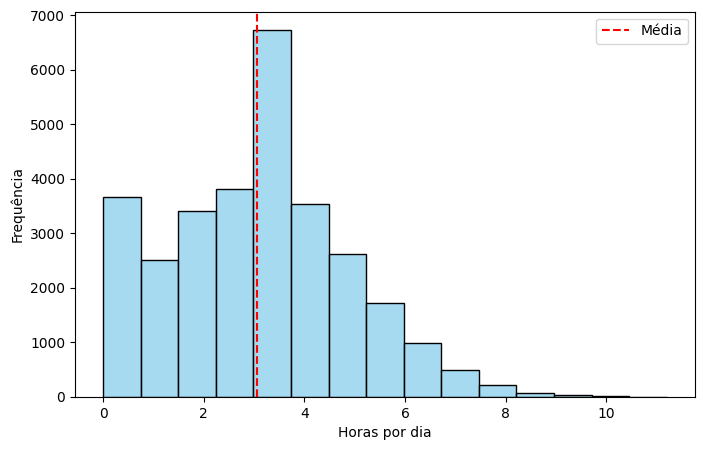

In [ ]:
print("Distribuição do tempo que os usuários passam diariamente nas redes sociais.")
print(f"Média: {df['daily_social_media_time'].mean():.2f} horas")

plt.figure(figsize=(8, 5))
sns.histplot(df['daily_social_media_time'], bins=15, kde=False, color='skyblue')
plt.axvline(df['daily_social_media_time'].mean(), color='red', linestyle='--', label='Média')
plt.xlabel('Horas por dia')
plt.ylabel('Frequência')
plt.legend()
plt.show()

### 2.2 Horas de Sono

Distribuição das horas de sono registradas pelos usuários.
Média: 6.50 horas


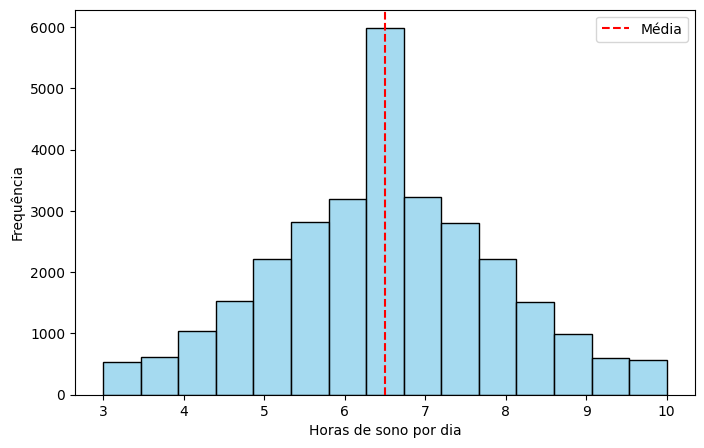

In [ ]:
print("Distribuição das horas de sono registradas pelos usuários.")
print(f"Média: {df['sleep_hours'].mean():.2f} horas")

plt.figure(figsize=(8, 5))
sns.histplot(df['sleep_hours'], bins=15, kde=False, color='skyblue')
plt.axvline(df['sleep_hours'].mean(), color='red', linestyle='--', label='Média')
plt.xlabel('Horas de sono por dia')
plt.ylabel('Frequência')
plt.legend()
plt.show()

### 2.3 Pontuação de Produtividade Real

Distribuição das pontuações reais de produtividade.
Média: 4.95


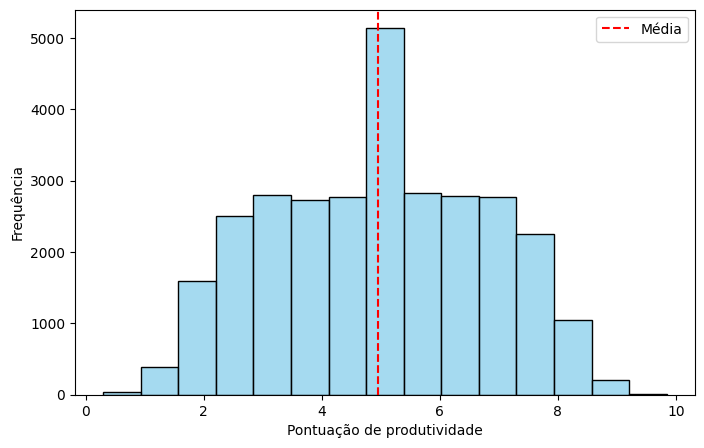

In [ ]:
print("Distribuição das pontuações reais de produtividade.")
print(f"Média: {df['actual_productivity_score'].mean():.2f}")

plt.figure(figsize=(8, 5))
sns.histplot(df['actual_productivity_score'], bins=15, kde=False, color='skyblue')
plt.axvline(df['actual_productivity_score'].mean(), color='red', linestyle='--', label='Média')
plt.xlabel('Pontuação de produtividade')
plt.ylabel('Frequência')
plt.legend()
plt.show()

### 2.4 Distribuição da Categoria de Uso

Frequência das categorias de uso registradas no dataset.


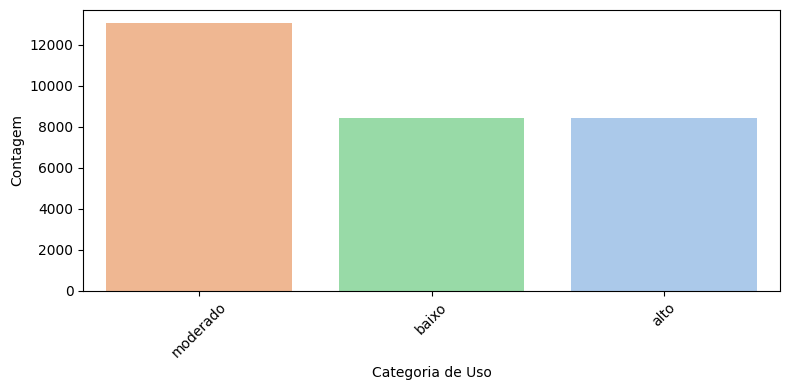

In [ ]:
print("Frequência das categorias de uso registradas no dataset.")

plt.figure(figsize=(8, 4))
sns.countplot(
    x='uso_categoria',
    data=df,
    order=df['uso_categoria'].value_counts().index,
    hue='uso_categoria',
    legend=False,
    palette='pastel'
)
plt.xlabel('Categoria de Uso')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 2.5 Distribuição por Gênero

Distribuição dos gêneros dos participantes da pesquisa.


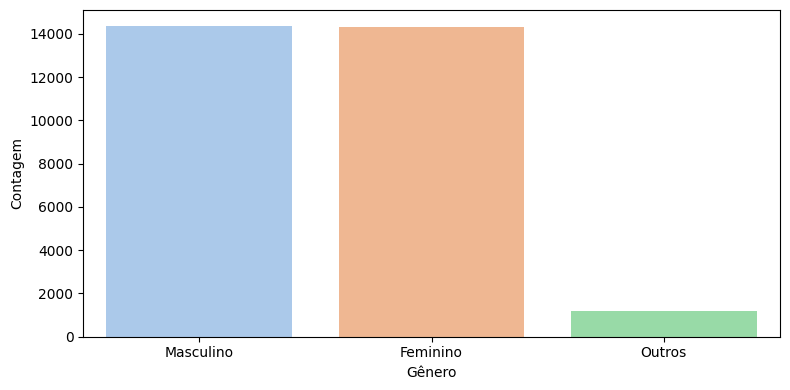

In [ ]:
print("Distribuição dos gêneros dos participantes da pesquisa.")

mapa_genero = {'Male': 'Masculino', 'Female': 'Feminino', 'Other': 'Outros'}
df['gender'] = df['gender'].map(mapa_genero).fillna(df['gender'])

plt.figure(figsize=(8, 4))
sns.countplot(
    x='gender',
    data=df,
    order=df['gender'].value_counts().index,
    hue='gender',
    legend=False,
    palette='pastel'
)
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()


## 4. Análise Bivariada

### 4.1 Correlação entre variáveis numéricas

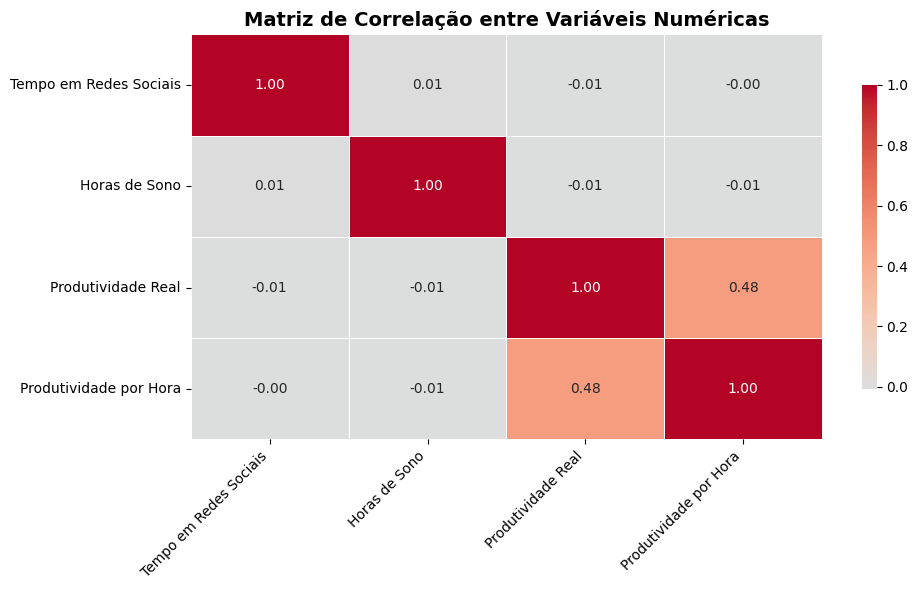

In [ ]:
# Dicionário de nomes em português
nomes_em_portugues = {
    'daily_social_media_time': 'Tempo em Redes Sociais',
    'sleep_hours': 'Horas de Sono',
    'actual_productivity_score': 'Produtividade Real',
    'produtividade_por_hora': 'Produtividade por Hora'
}

# Substituir nomes das colunas por português
df_corr = df[num_cols].rename(columns=nomes_em_portugues)

corr_matrix = df_corr.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5, cbar_kws={"shrink": .75})

plt.title('Matriz de Correlação entre Variáveis Numéricas', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### 4.2 Relação principal: Redes Sociais vs Produtividade

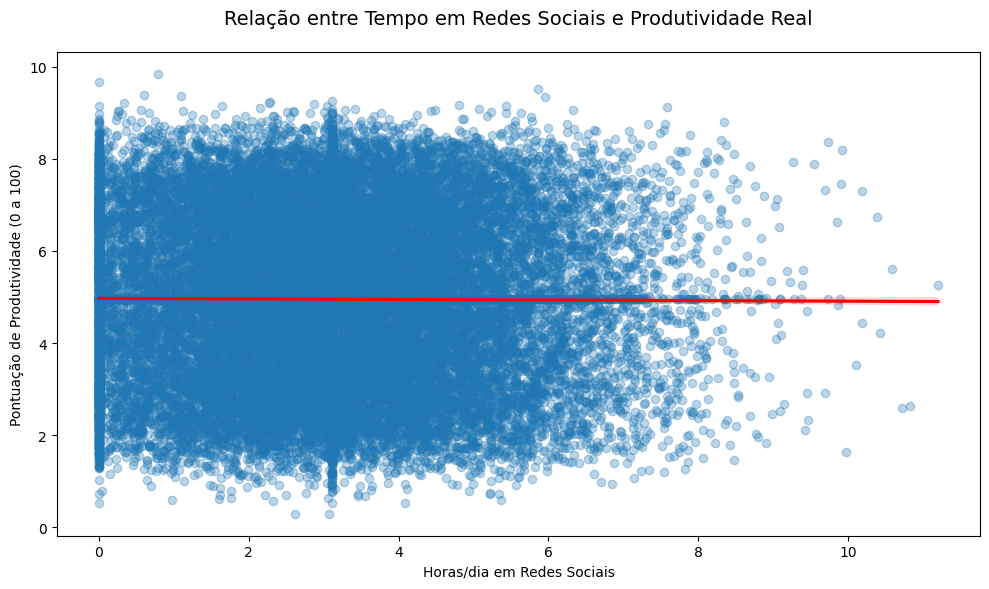

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='daily_social_media_time',
    y='actual_productivity_score',
    data=df,
    scatter_kws={'alpha': 0.3},
    line_kws={'color': 'red'}
)
plt.title('Relação entre Tempo em Redes Sociais e Produtividade Real', pad=20, fontsize=14)
plt.xlabel('Horas/dia em Redes Sociais')
plt.ylabel('Pontuação de Produtividade (0 a 100)')
plt.tight_layout()
plt.show()

## 5. Análise por Segmentos

### 5.1 Produtividade média por categoria de uso

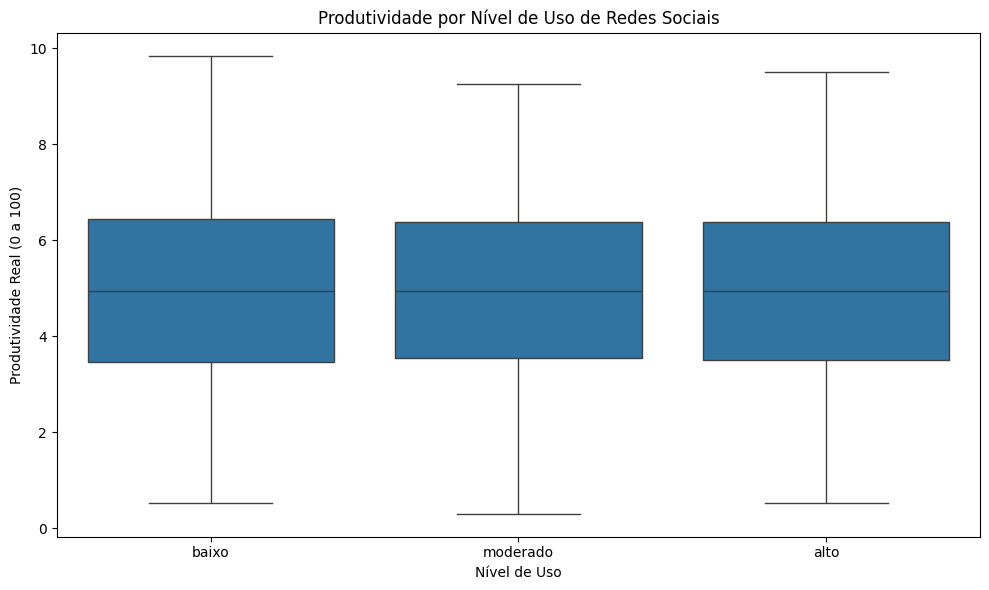

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='uso_categoria',
    y='actual_productivity_score',
    data=df,
    order=['baixo', 'moderado', 'alto']
)
plt.title('Produtividade por Nível de Uso de Redes Sociais')
plt.xlabel('Nível de Uso')
plt.ylabel('Produtividade Real (0 a 100)')
plt.tight_layout()
plt.show()

### 5.2 Produtividade Real por Faixas de Tempo em Redes Sociais

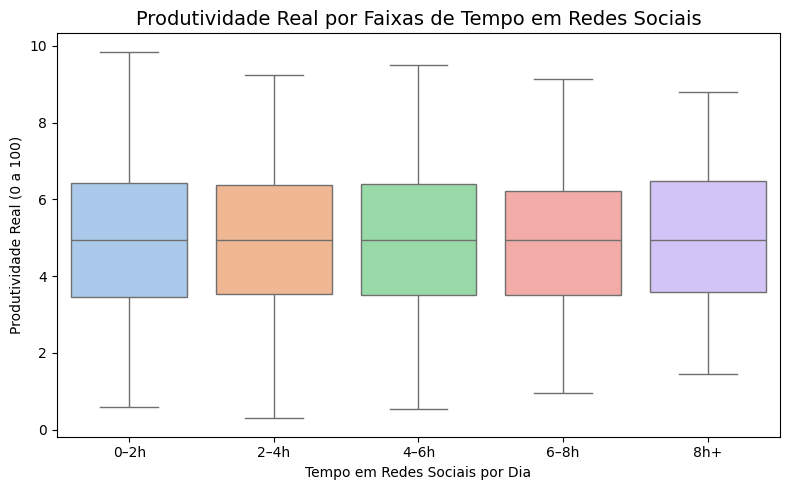

In [ ]:
df['faixa_redes_sociais'] = pd.cut(
    df['daily_social_media_time'],
    bins=[0, 2, 4, 6, 8, 12],
    labels=['0–2h', '2–4h', '4–6h', '6–8h', '8h+']
)

plt.figure(figsize=(8, 5))
sns.boxplot(
    x='faixa_redes_sociais',
    y='actual_productivity_score',
    data=df,
    hue='faixa_redes_sociais',
    legend=False,
    palette='pastel'
)
plt.title('Produtividade Real por Faixas de Tempo em Redes Sociais', fontsize=14)
plt.xlabel('Tempo em Redes Sociais por Dia')
plt.ylabel('Produtividade Real (0 a 100)')
plt.tight_layout()
plt.show()

### 5.3 Interação entre sono e redes sociais

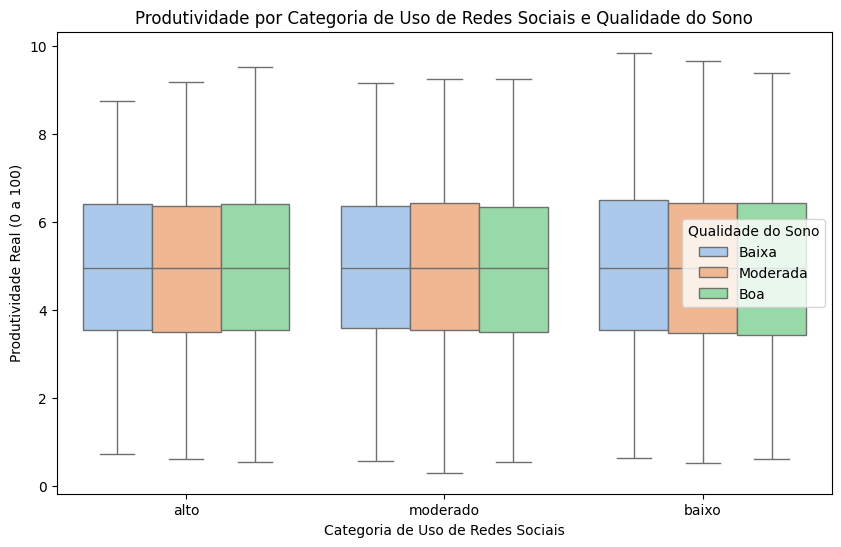

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    x='uso_categoria',
    y='actual_productivity_score',
    hue='qualidade_sono',
    data=df,
    palette='pastel'
)
plt.title('Produtividade por Categoria de Uso de Redes Sociais e Qualidade do Sono')
plt.xlabel('Categoria de Uso de Redes Sociais')
plt.ylabel('Produtividade Real (0 a 100)')
plt.legend(title='Qualidade do Sono')
plt.show()

## 6. Análise Multivariada

### 6.1 Pairplot das principais variáveis

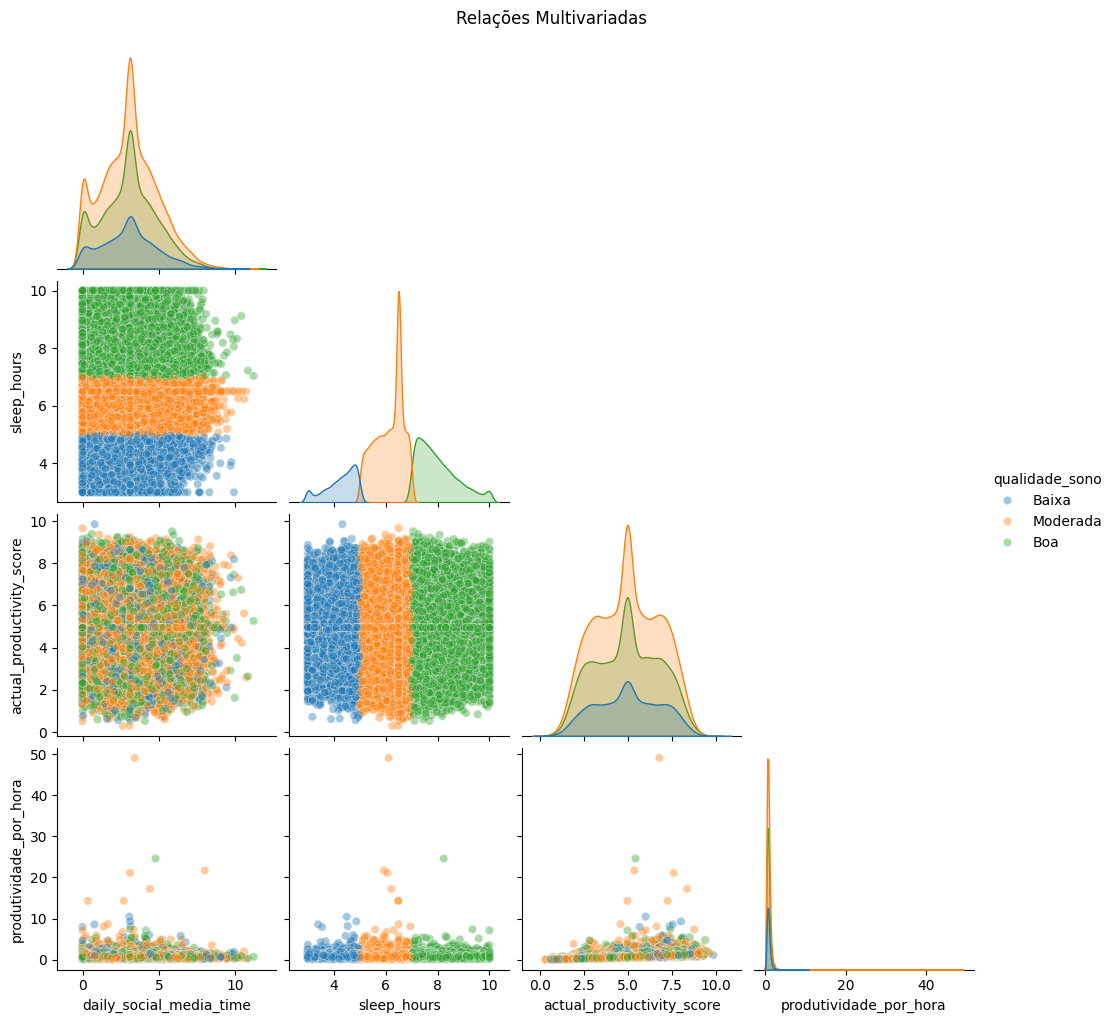

In [ ]:
sns.pairplot(df[num_cols + ['qualidade_sono']],
             hue='qualidade_sono',
             plot_kws={'alpha':0.4},
             corner=True)
plt.suptitle('Relações Multivariadas', y=1.02)
plt.show()

### 6.2 Heatmap de grupos

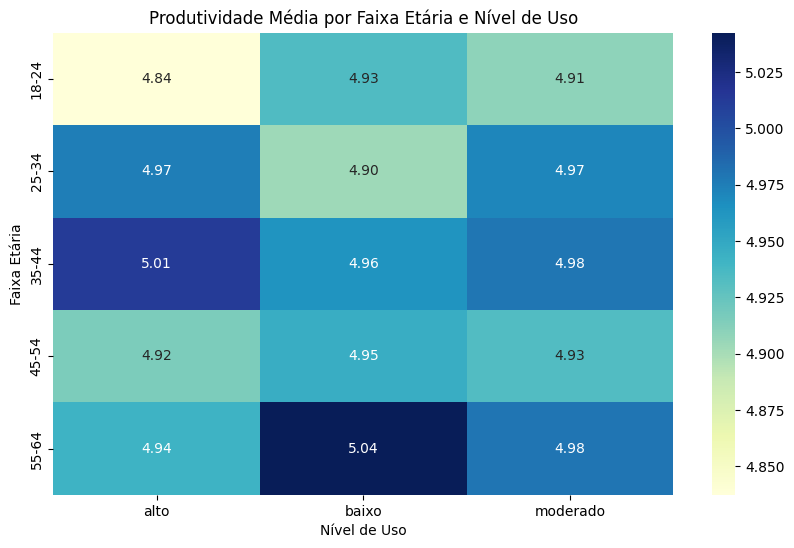

In [ ]:
# Criar faixa etária (ajuste os bins conforme sua necessidade)
df['age_group'] = pd.cut(df['age'], bins=[18,25,35,45,55,65,100],
                         labels=['18-24','25-34','35-44','45-54','55-64','65+'])

# Criar tabela pivot com média da produtividade real
pivot_table = df.pivot_table(
    index='age_group',
    columns='uso_categoria',
    values='actual_productivity_score',
    aggfunc='mean',
    observed=False
)

plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Produtividade Média por Faixa Etária e Nível de Uso')
plt.ylabel('Faixa Etária')
plt.xlabel('Nível de Uso')
plt.show()


## 7. Testes Estatísticos

### 7.1 Teste ANOVA entre grupos

In [ ]:
# Nomes das colunas no DataFrame
colunas_produtividade_pt = [
    'perceived_productivity_score',
    'actual_productivity_score',
    'produtividade_por_hora'
]

# Mapeamento para exibição em português
colunas_produtividade_display = {
    'perceived_productivity_score': 'Produtividade Percebida',
    'actual_productivity_score': 'Produtividade Real',
    'produtividade_por_hora': 'Produtividade por Hora'
}

for col in colunas_produtividade_pt:
    grupos = [df[df['uso_categoria'] == cat][col].dropna() for cat in ['baixo', 'moderado', 'alto']]
    f_val, p_val = stats.f_oneway(*grupos)
    print(f"ANOVA para {colunas_produtividade_display[col]}: F-value = {f_val:.2f}, p-value = {p_val:.4f}")


ANOVA para Produtividade Percebida: F-value = 0.62, p-value = 0.5360
ANOVA para Produtividade Real: F-value = 0.26, p-value = 0.7677
ANOVA para Produtividade por Hora: F-value = 0.02, p-value = 0.9843


### 7.2 Correlação de Spearman (não-linear)

In [ ]:
corr, p_value = stats.spearmanr(df['daily_social_media_time'], df['actual_productivity_score'])
print(f"Correlação de Spearman: {corr:.2f} (p-value = {p_value:.4f})")

Correlação de Spearman: -0.00 (p-value = 0.4582)


### 7.3 Correlações de Spearman entre variáveis de produtividade e outras variáveis:

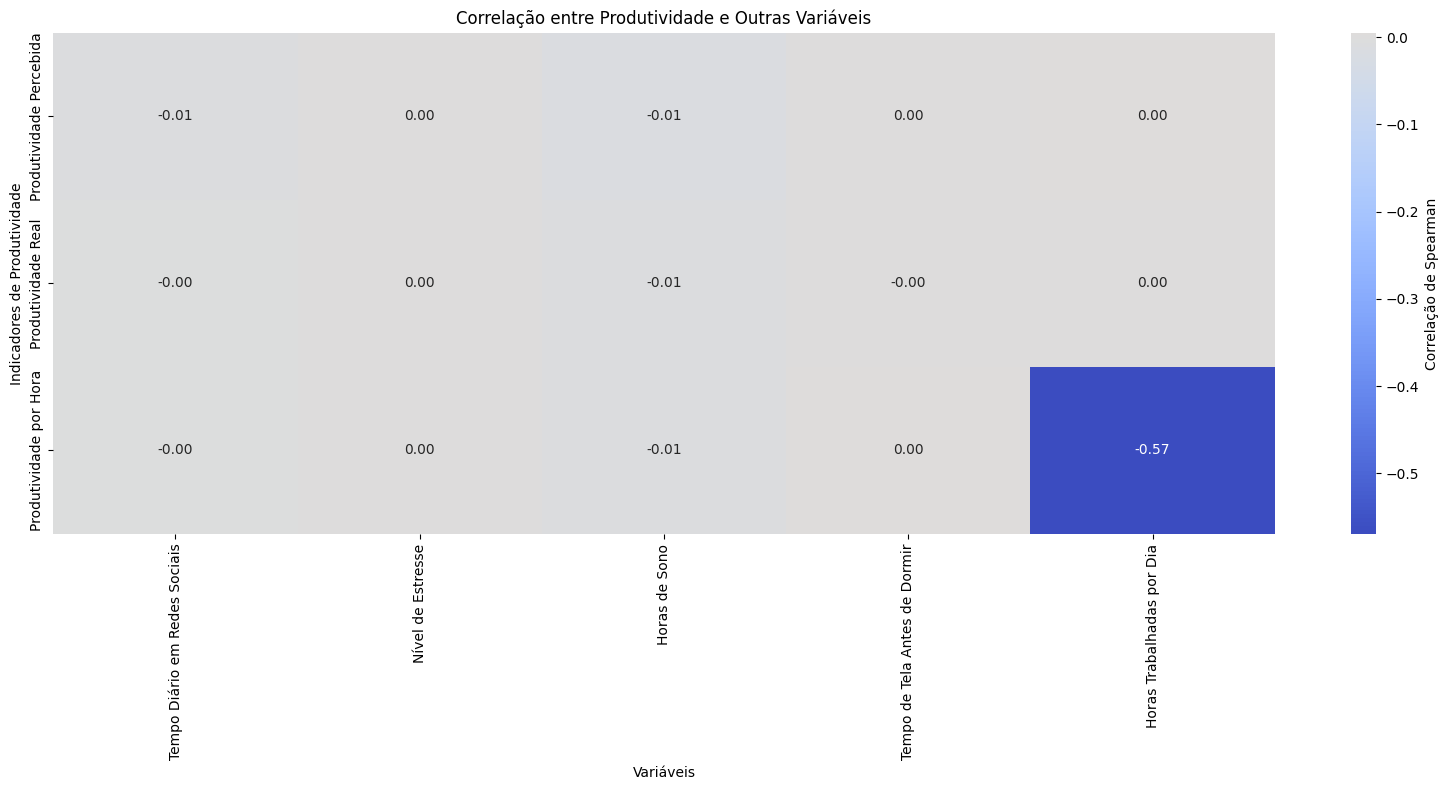

In [ ]:
# Variáveis de produtividade
variaveis_produtividade = [
    'perceived_productivity_score',
    'actual_productivity_score',
    'produtividade_por_hora'
]

# Outras variáveis para correlacionar
outras_variaveis = [
    'daily_social_media_time',
    'stress_level',
    'sleep_hours',
    'screen_time_before_sleep',
    'work_hours_per_day'
]

# Mapeamento para exibição em português
nomes_variaveis_display = {
    'perceived_productivity_score': 'Produtividade Percebida',
    'actual_productivity_score': 'Produtividade Real',
    'produtividade_por_hora': 'Produtividade por Hora',
    'daily_social_media_time': 'Tempo Diário em Redes Sociais',
    'stress_level': 'Nível de Estresse',
    'sleep_hours': 'Horas de Sono',
    'screen_time_before_sleep': 'Tempo de Tela Antes de Dormir',
    'work_hours_per_day': 'Horas Trabalhadas por Dia'
}

# Criar matriz para armazenar correlações
matriz_corr = pd.DataFrame(index=[nomes_variaveis_display[v] for v in variaveis_produtividade],
                          columns=[nomes_variaveis_display[v] for v in outras_variaveis],
                          dtype=float)

# Calcular correlações de Spearman
for prod in variaveis_produtividade:
    for var in outras_variaveis:
        subset = df[[prod, var]].dropna()
        if len(subset) > 1:
            corr, _ = stats.spearmanr(subset[prod], subset[var])
            matriz_corr.loc[nomes_variaveis_display[prod], nomes_variaveis_display[var]] = corr
        else:
            matriz_corr.loc[nomes_variaveis_display[prod], nomes_variaveis_display[var]] = np.nan

# Plotar heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f",
            cbar_kws={'label': 'Correlação de Spearman'})
plt.title('Correlação entre Produtividade e Outras Variáveis')
plt.xlabel('Variáveis')
plt.ylabel('Indicadores de Produtividade')
plt.tight_layout()
plt.show()

## 8. Insights e Hipóteses

Valores únicos em 'qualidade_sono':
['Moderada', 'Boa', 'Baixa']
Categories (3, object): ['Baixa' < 'Moderada' < 'Boa']
Valores não mapeados encontrados:
['Moderada', 'Boa', 'Baixa']
Categories (3, object): ['Baixa' < 'Moderada' < 'Boa']

Correlação de Spearman: -0.00 (p-valor = 0.4582)


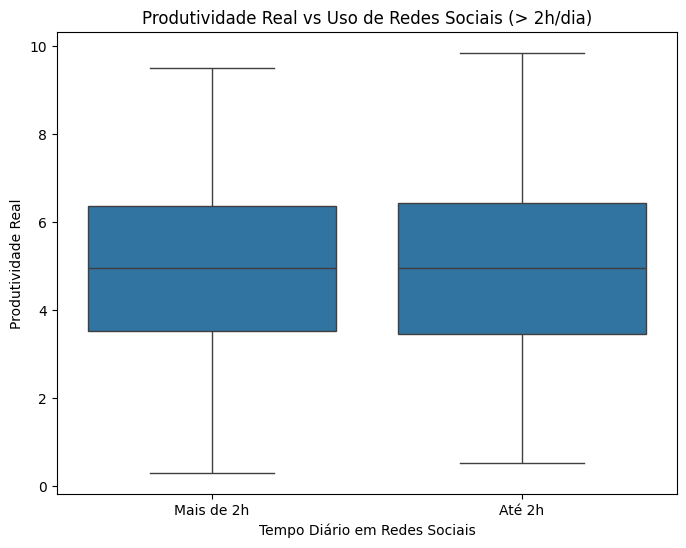

Teste t: t = 0.02, p-valor = 0.9878


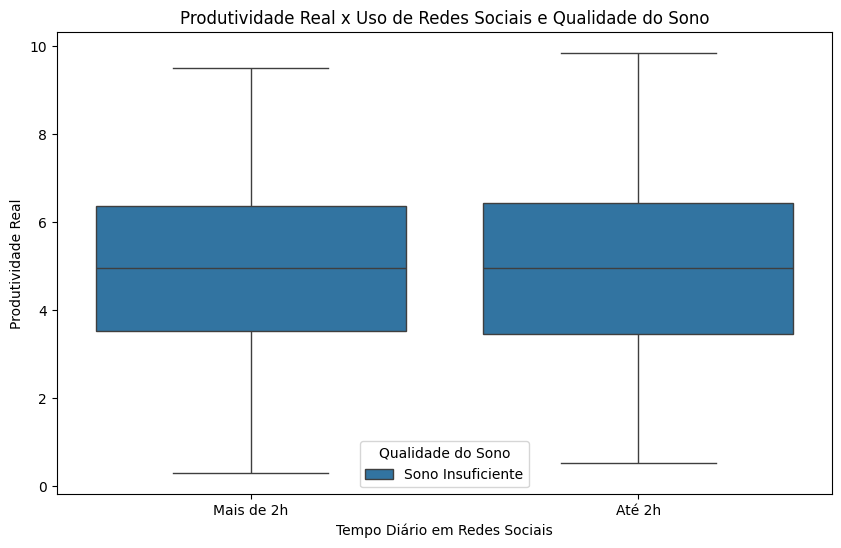

In [ ]:
# 1. Diagnosticar os valores únicos da coluna qualidade_sono
print("Valores únicos em 'qualidade_sono':")
print(df['qualidade_sono'].unique())

# 2. Criar o mapa correto (ajuste conforme os valores exibidos acima)
mapa_sono = {
    'baixa': 1,
    'media': 2,
    'alta': 3,
}

# 3. Mapear para numérico, criando nova coluna
df['qualidade_sono_num'] = df['qualidade_sono'].map(mapa_sono)
nans = df['qualidade_sono_num'].isna().sum()
if nans > 0:
    print("Valores não mapeados encontrados:")
    print(df.loc[df['qualidade_sono_num'].isna(), 'qualidade_sono'].unique())

# 5. Criar categorização Sono Adequado x Sono Insuficiente pela mediana
mediana_sono = df['qualidade_sono_num'].median()
df['sono_categoria'] = np.where(df['qualidade_sono_num'] >= mediana_sono, 'Sono Adequado', 'Sono Insuficiente')

# --- 6. Correlação negativa entre tempo em redes sociais e produtividade ---
corr, p_val = stats.spearmanr(df['daily_social_media_time'], df['actual_productivity_score'])
print(f"\nCorrelação de Spearman: {corr:.2f} (p-valor = {p_val:.4f})")

# --- 7. Efeito limite: impacto após 2h/dia ---
df['uso_limite_2h'] = np.where(df['daily_social_media_time'] > 2, 'Mais de 2h', 'Até 2h')

plt.figure(figsize=(8,6))
sns.boxplot(x='uso_limite_2h', y='actual_productivity_score', data=df)
plt.title('Produtividade Real vs Uso de Redes Sociais (> 2h/dia)')
plt.xlabel('Tempo Diário em Redes Sociais')
plt.ylabel('Produtividade Real')
plt.show()

grupo_ate_2h = df[df['uso_limite_2h'] == 'Até 2h']['actual_productivity_score'].dropna()
grupo_mais_2h = df[df['uso_limite_2h'] == 'Mais de 2h']['actual_productivity_score'].dropna()
t_stat, p_val_ttest = stats.ttest_ind(grupo_ate_2h, grupo_mais_2h, equal_var=False)
print(f"Teste t: t = {t_stat:.2f}, p-valor = {p_val_ttest:.4f}")

# --- 8. Fator moderador: sono adequando reduz efeito negativo ---
plt.figure(figsize=(10,6))
sns.boxplot(x='uso_limite_2h', y='actual_productivity_score', hue='sono_categoria', data=df)
plt.title('Produtividade Real x Uso de Redes Sociais e Qualidade do Sono')
plt.xlabel('Tempo Diário em Redes Sociais')
plt.ylabel('Produtividade Real')
plt.legend(title='Qualidade do Sono')
plt.show()

# --- 9. Preparar variáveis para modelagem ---
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
df['faixa_etaria'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

df['interacao_uso_sono'] = df['daily_social_media_time'] * df['qualidade_sono_num']

## 9. Geração de Relatório PDF